## Questions i want to answer using immoscout data

I will focus only on berlin related data:

1) Where are most apartments located (Area, street, plz)
2) What is the rent price range for Berlin apartments
3) What are the most common type of apartments offered (ground floor, rooftop, ect..)
4) What is the overall trend in rental prices? is it going up? why?
5) What are the most requested documents to apply? (Check discription for key words)
6) Which month has the highest number of listings? 
7) Build a model that can predict the rental price based on key features(regression)

I have two datasets scraped from immoscout24

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()
import plotly.express as px

pd.set_option('display.max_columns', None)

## Data exploration 

In [2]:
#Upload all datasets you have
data1 = pd.read_csv('Data/immo_data.csv')
data2 = pd.read_csv('Data/apr20_rental_no_duplicates.csv')

C:\Users\moham\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning:

Columns (36,84,85) have mixed types.Specify dtype option on import or set low_memory=False.



Check every data set and see which coulmns they have in common

### Dataset 1

In [3]:
data1.head(2)

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,houseNumber,livingSpace,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.0,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,840.0,1965.0,96107057,1.0,oil,False,Nordrhein_Westfalen,True,2.0,595.0,244,86.0,Dortmund,well_kept,normal,NaN,Sch&uuml;ruferstra&szlig;e,Schüruferstraße,False,4,ground_floor,44269,4.0,181.4,1.0,3.0,4,True,4,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.0,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,NaN,1871.0,111378734,2.0,gas,False,Rheinland_Pfalz,False,1.0,800.0,NaN,89.0,Rhein_Pfalz_Kreis,refurbished,normal,no,no_information,NaN,False,5,ground_floor,67459,3.0,NaN,NaN,NaN,3,False,4,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN,May19


In [4]:
# Check main characteristics of dataset
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   regio1                    268850 non-null  object 
 1   serviceCharge             261941 non-null  float64
 2   heatingType               223994 non-null  object 
 3   telekomTvOffer            236231 non-null  object 
 4   telekomHybridUploadSpeed  45020 non-null   float64
 5   newlyConst                268850 non-null  bool   
 6   balcony                   268850 non-null  bool   
 7   picturecount              268850 non-null  int64  
 8   pricetrend                267018 non-null  float64
 9   telekomUploadSpeed        235492 non-null  float64
 10  totalRent                 228333 non-null  float64
 11  yearConstructed           211805 non-null  float64
 12  scoutId                   268850 non-null  int64  
 13  noParkSpaces              93052 non-null   f

In [5]:
# Check measures of central tendency and variation
data1.describe()

,serviceCharge,telekomHybridUploadSpeed,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,yearConstructedRange,baseRent,livingSpace,baseRentRange,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,livingSpaceRange,heatingCosts,lastRefurbish,electricityBasePrice,electricityKwhPrice
count,261941.000000,45020.0,268850.000000,267018.000000,235492.000000,2.283330e+05,211805.000000,2.688500e+05,93052.000000,211805.000000,2.688500e+05,268850.000000,268850.000000,268850.000000,268850.000000,162344.000000,217541.000000,171118.000000,268850.000000,268850.000000,85518.000000,80711.000000,46846.000000,46846.000000
mean,151.206113,10.0,9.791958,3.389001,28.804928,9.013315e+02,1966.400590,1.069697e+08,1.327634,3.714544,6.941294e+02,74.355548,3.765256,37283.022235,2.641261,114.749533,2.122405,3.572319,2.571542,3.070790,76.990866,2013.904536,89.113612,0.199769
std,308.295790,0.0,6.408399,1.964874,16.337151,3.323833e+04,46.992207,1.250093e+07,8.361403,2.738134,1.953602e+04,254.759208,2.214357,27798.037296,2.633440,61.653663,3.634934,6.375496,0.937594,1.407127,147.716278,10.963125,5.395805,0.009667
min,0.000000,10.0,0.000000,-12.330000,1.000000,0.000000e+00,1000.000000,2.887174e+07,0.000000,1.000000,0.000000e+00,0.000000,1.000000,852.000000,1.000000,0.100000,-1.000000,0.000000,1.000000,1.000000,0.000000,1015.000000,71.430000,0.170500
25%,95.000000,10.0,6.000000,2.000000,10.000000,4.698000e+02,1950.000000,1.066910e+08,1.000000,1.000000,3.380000e+02,54.000000,2.000000,9128.000000,2.000000,79.000000,1.000000,2.000000,2.000000,2.000000,54.000000,2012.000000,90.760000,0.191500
50%,135.000000,10.0,9.000000,3.390000,40.000000,6.500000e+02,1973.000000,1.111584e+08,1.000000,3.000000,4.900000e+02,67.320000,3.000000,38667.000000,3.000000,107.000000,2.000000,3.000000,3.000000,3.000000,70.000000,2017.000000,90.760000,0.198500
75%,190.000000,10.0,13.000000,4.570000,40.000000,9.850000e+02,1996.000000,1.137688e+08,1.000000,5.000000,7.990000e+02,87.000000,5.000000,57072.000000,3.000000,140.300000,3.000000,4.000000,3.000000,4.000000,90.000000,2019.000000,90.760000,0.205500
max,146118.000000,10.0,121.000000,14.920000,100.000000,1.575154e+07,2090.000000,1.157117e+08,2241.000000,9.000000,9.999999e+06,111111.000000,9.000000,99998.000000,999.990000,1996.000000,999.000000,999.000000,5.000000,7.000000,12613.000000,2919.000000,90.760000,0.227600


Just by checking some of the coulmns it is clear that the data contains outliers and missing values that we will need to correct or remove. This is very common in webscraped data.

## Checking for missing values

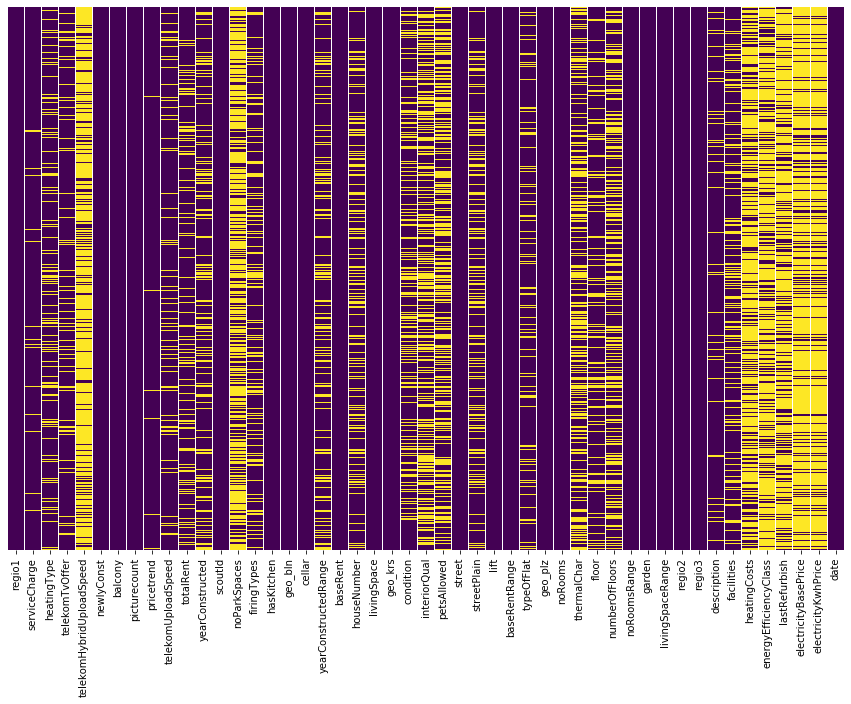

In [6]:
#check for missing values
# Yellow = NAN value
plt.figure(figsize = (15,10))
sns.heatmap(data1.isnull(),
            yticklabels=False,
            cbar=False,
            cmap='viridis');

The following columns have too many missing values or are not very important to my goal:

- telekomTvOffer
- telekomHybridUploadSpeed
- noParkSpaces
- telekomUploadSpeed
- houseNumber
- thermalChar
- heatingCosts 
- energyEfficiencyClas
- lastRefurbish 
- electricityBasePrice 
- electricityKwhPrice
- facilities
- livingSpaceRange          
- baseRentRange
- noRoomsRange
- street
- picturecount
- pricetrend
- yearConstructedRange


I will remove hese columns from the dataset

In [7]:
df_immo1 = data1.drop(['telekomTvOffer', 'telekomHybridUploadSpeed', 'noParkSpaces', 
                       'telekomUploadSpeed', 'houseNumber', 'thermalChar','heatingCosts', 
                       'energyEfficiencyClass', 'lastRefurbish', 'electricityBasePrice', 
                       'electricityKwhPrice', 'facilities', 'noRoomsRange', 'baseRentRange',
                      'livingSpaceRange','street', 'picturecount','pricetrend', 'yearConstructedRange' ], axis = 1)
df_immo1.head()

,regio1,serviceCharge,heatingType,newlyConst,balcony,totalRent,yearConstructed,scoutId,firingTypes,hasKitchen,geo_bln,cellar,baseRent,livingSpace,geo_krs,condition,interiorQual,petsAllowed,streetPlain,lift,typeOfFlat,geo_plz,noRooms,floor,numberOfFloors,garden,regio2,regio3,description,date
0,Nordrhein_Westfalen,245.00,central_heating,False,False,840.0,1965.0,96107057,oil,False,Nordrhein_Westfalen,True,595.0,86.00,Dortmund,well_kept,normal,NaN,Schüruferstraße,False,ground_floor,44269,4.0,1.0,3.0,True,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,False,True,NaN,1871.0,111378734,gas,False,Rheinland_Pfalz,False,800.0,89.00,Rhein_Pfalz_Kreis,refurbished,normal,no,NaN,False,ground_floor,67459,3.0,NaN,NaN,False,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,May19
2,Sachsen,255.00,floor_heating,True,True,1300.0,2019.0,113147523,NaN,False,Sachsen,True,965.0,83.80,Dresden,first_time_use,sophisticated,NaN,Turnerweg,True,apartment,1097,3.0,3.0,4.0,False,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,Oct19
3,Sachsen,58.15,district_heating,False,True,NaN,1964.0,108890903,district_heating,False,Sachsen,False,343.0,58.15,Mittelsachsen_Kreis,NaN,NaN,NaN,Glück-Auf-Straße,False,other,9599,3.0,3.0,NaN,False,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,May19
4,Bremen,138.00,self_contained_central_heating,False,True,903.0,1950.0,114751222,gas,False,Bremen,False,765.0,84.97,Bremen,refurbished,NaN,NaN,Hermann-Henrich-Meier-Allee,False,apartment,28213,3.0,1.0,NaN,False,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Feb20



Check all columns that contain location info and see if there are any duplicates

In [8]:
df_immo1[['regio1','geo_bln','geo_krs', 'geo_plz', 'regio2', 'regio3' ]].head()

,regio1,geo_bln,geo_krs,geo_plz,regio2,regio3
0,Nordrhein_Westfalen,Nordrhein_Westfalen,Dortmund,44269,Dortmund,Schüren
1,Rheinland_Pfalz,Rheinland_Pfalz,Rhein_Pfalz_Kreis,67459,Rhein_Pfalz_Kreis,Böhl_Iggelheim
2,Sachsen,Sachsen,Dresden,1097,Dresden,Äußere_Neustadt_Antonstadt
3,Sachsen,Sachsen,Mittelsachsen_Kreis,9599,Mittelsachsen_Kreis,Freiberg
4,Bremen,Bremen,Bremen,28213,Bremen,Neu_Schwachhausen


In [9]:
#remove geo_bln and geo_krs
df_immo1.drop(['geo_bln','geo_krs'], axis = 1, inplace = True)

In [10]:
#check all columns left in dataset
df_immo1.head()

,regio1,serviceCharge,heatingType,newlyConst,balcony,totalRent,yearConstructed,scoutId,firingTypes,hasKitchen,cellar,baseRent,livingSpace,condition,interiorQual,petsAllowed,streetPlain,lift,typeOfFlat,geo_plz,noRooms,floor,numberOfFloors,garden,regio2,regio3,description,date
0,Nordrhein_Westfalen,245.00,central_heating,False,False,840.0,1965.0,96107057,oil,False,True,595.0,86.00,well_kept,normal,NaN,Schüruferstraße,False,ground_floor,44269,4.0,1.0,3.0,True,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,False,True,NaN,1871.0,111378734,gas,False,False,800.0,89.00,refurbished,normal,no,NaN,False,ground_floor,67459,3.0,NaN,NaN,False,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,May19
2,Sachsen,255.00,floor_heating,True,True,1300.0,2019.0,113147523,NaN,False,True,965.0,83.80,first_time_use,sophisticated,NaN,Turnerweg,True,apartment,1097,3.0,3.0,4.0,False,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,Oct19
3,Sachsen,58.15,district_heating,False,True,NaN,1964.0,108890903,district_heating,False,False,343.0,58.15,NaN,NaN,NaN,Glück-Auf-Straße,False,other,9599,3.0,3.0,NaN,False,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,May19
4,Bremen,138.00,self_contained_central_heating,False,True,903.0,1950.0,114751222,gas,False,False,765.0,84.97,refurbished,NaN,NaN,Hermann-Henrich-Meier-Allee,False,apartment,28213,3.0,1.0,NaN,False,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Feb20


## Dataset2 

In [11]:
data2.head()

,Unnamed: 0,obj_regio1,obj_serviceCharge,obj_heatingType,obj_telekomTvOffer,obj_cId,obj_newlyConst,obj_balcony,obj_picture,obj_picturecount,obj_pricetrend,obj_telekomUploadSpeed,obj_totalRent,obj_telekomTrackingGroup,obj_telekomInternetTechnology,obj_yearConstructed,obj_telekomInternetType,obj_pricetrendbuy,obj_scoutId,obj_noParkSpaces,obj_firingTypes,obj_hasKitchen,obj_ExclusiveExpose,obj_telekomInternetProductName,geo_bln,obj_cellar,obj_yearConstructedRange,obj_baseRent,obj_houseNumber,obj_pricetrendrent,obj_livingSpace,geo_krs,obj_zipCode,obj_condition,obj_interiorQual,obj_petsAllowed,ga_cd_cxp_historicallisting,obj_telekomDownloadSpeed,obj_street,obj_lift,obj_depositLink,obj_baseRentRange,obj_telekomInternetUrlMobile,obj_telekomInternetUrl,obj_streetPlain,obj_typeOfFlat,geo_plz,obj_noRooms,obj_assistedLiving,obj_ityp,obj_telekomHdTelephone,geo_land,ga_cd_via,obj_telekomInternet,obj_immotype,obj_floor,obj_telekomInternetServices,obj_telekomInternetProductAvailable,obj_cwId,ga_cd_application_requirements,obj_numberOfFloors,obj_noRoomsRange,ga_cd_maillead_default_shown,obj_garden,evt_count_pm_sig,obj_barrierFree,obj_regio3,obj_objectnumber,obj_livingSpaceRange,obj_regio2,URL,beschreibung,obj_telekomHybridUploadSpeed,obj_lastRefurbish,obj_telekomHybridDownloadSpeed,obj_galleryAd,obj_energyType,obj_energyEfficiencyClass,obj_thermalChar,obj_heatingCosts,obj_groupnumber,ga_cd_developer_virtualreality,ga_cd_via_qualified,obj_project_id,obj_nbp,ga_cd_customer_group
0,0,Nordrhein_Westfalen,174.0,floor_heating,ONE_YEAR_FREE,18611189,y,y,https://pictures.immobilienscout24.de/listings...,14,3.68,40 MBit/s,887.0,telekom_layer_magenta_l,über Glasfaser,2019.0,REGULAR,9.79,117388568,1.0,district_heating,n,False,MagentaZuhause L,Nordrhein_Westfalen,y,9.0,713.0,31a,3.68,62.0,Bielefeld,33602,first_time_use,sophisticated,no,False,100 MBit/s,Werner-Bock-Stra&szlig;e,y,y,5,https://padlock.link/ioml,https://padlock.link/ml,Werner-Bock-Straße,ground_floor,33602,2.0,n,"0,active",True,Deutschland,standard,100 MBit/s,wohnung_miete,1.0,"web,email,bank,music,dl-ul,game,sd,mltstr,hd,f...",True,009.ef42b833-0a6f-4411-bb90-17d693e8388b,profile0,5.0,2,True,n,showqualicontactform,y,Innenstadt,aed0c058-e395-4d65-84b3-85f94a21bd5f,3,Bielefeld,/expose/117388568,"[""Diese innenstadtnahe 2-Zimmer-Neubau-Erdgesc...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Nordrhein_Westfalen,110.0,central_heating,ONE_YEAR_FREE,18630986,n,y,https://pictures.immobilienscout24.de/listings...,10,3.12,"2,4 MBit/s",690.0,telekom_layer_magenta_m_hybrid2,über Hybrid,2002.0,WITH_HYBRID,6.87,117387341,1.0,oil,y,False,MagentaZuhause M Hybrid (2),Nordrhein_Westfalen,y,6.0,580.0,no_information,3.12,70.0,Minden_Lübbecke_Kreis,32339,negotiable,normal,no,False,16 MBit/s,no_information,n,y,4,https://padlock.link/mmh2sa,https://padlock.link/mmhy2,no_information,ground_floor,32339,2.0,n,"0,active",True,Deutschland,standard,50 MBit/s,wohnung_miete,1.0,"web,email,bank,music,dl-ul,game,sd,mltstr,hd",True,009.af1fcc28-5c7f-40e5-8404-17f3e4aa1371,profile0,2.0,2,True,y,showqualicontactform,n,Espelkamp,5fe224ee-998b-4edd-be00-805fecd853e7,3,Minden_Lübbecke_Kreis,/expose/117387341,"['Die Wohnung, um die es sich hier handelt, ka...",10 MBit/s,2017.0,50 MBit/s,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Bayern,260.0,central_heating,ONE_YEAR_FREE,18593341,n,y,https://pictures.immobilienscout24.de/listings...,19,4.73,40 MBit/s,1885.0,telekom_layer_magenta_l,über VDSL,2015.0,REGULAR,4.54,117389792,1.0,gas:oil,y,False,MagentaZuhause L,Bayern,y,8.0,1590.0,no_information,4.73,152.0,Bad_Tölz_Wolfratshausen_Kreis,82544,well_kept,sophisticated,negotiable,False,100 MBit/s,no_information,y,n,8,https://padlock.link/ioml,https://padlock.link/ml,no_information,loft,82544,2.0,n,"0,active",True,Deutschland,standard,100 MBit/s,wohnung_miete,2.0,"web,email,bank,music,dl-ul,game,sd,mltstr,hd,f...",True,002.01009501817,profile0,2.0,2,True,n,showqualicontactform,n,Egling,FALC-MG-11509,7,Bad_Tölz_Wolfratsh

In [12]:
data2.columns

Index(['Unnamed: 0', 'obj_regio1', 'obj_serviceCharge', 'obj_heatingType',
       'obj_telekomTvOffer', 'obj_cId', 'obj_newlyConst', 'obj_balcony',
       'obj_picture', 'obj_picturecount', 'obj_pricetrend',
       'obj_telekomUploadSpeed', 'obj_totalRent', 'obj_telekomTrackingGroup',
       'obj_telekomInternetTechnology', 'obj_yearConstructed',
       'obj_telekomInternetType', 'obj_pricetrendbuy', 'obj_scoutId',
       'obj_noParkSpaces', 'obj_firingTypes', 'obj_hasKitchen',
       'obj_ExclusiveExpose', 'obj_telekomInternetProductName', 'geo_bln',
       'obj_cellar', 'obj_yearConstructedRange', 'obj_baseRent',
       'obj_houseNumber', 'obj_pricetrendrent', 'obj_livingSpace', 'geo_krs',
       'obj_zipCode', 'obj_condition', 'obj_interiorQual', 'obj_petsAllowed',
       'ga_cd_cxp_historicallisting', 'obj_telekomDownloadSpeed', 'obj_street',
       'obj_lift', 'obj_depositLink', 'obj_baseRentRange',
       'obj_telekomInternetUrlMobile', 'obj_telekomInternetUrl',
       'obj_stree

In [13]:
#Remove Unnamed: column
data2.drop('Unnamed: 0', axis = 1, inplace = True)

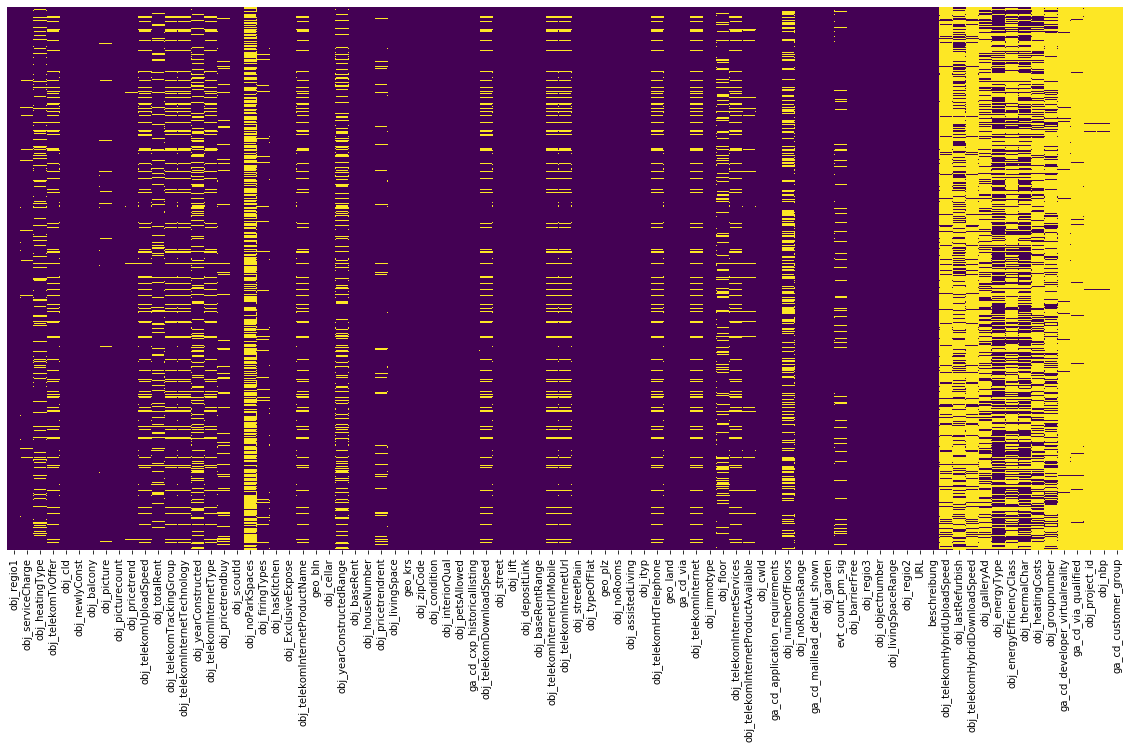

In [14]:
#check for missing values
# Yellow = NAN value
plt.figure(figsize = (20,10))
sns.heatmap(data2.isnull(),
            yticklabels=False,
            cbar=False,
            cmap='viridis');

In [15]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83273 entries, 0 to 83272
Data columns (total 85 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   obj_regio1                           83273 non-null  object 
 1   obj_serviceCharge                    81595 non-null  float64
 2   obj_heatingType                      72807 non-null  object 
 3   obj_telekomTvOffer                   73457 non-null  object 
 4   obj_cId                              83273 non-null  int64  
 5   obj_newlyConst                       83273 non-null  object 
 6   obj_balcony                          83273 non-null  object 
 7   obj_picture                          81890 non-null  object 
 8   obj_picturecount                     83273 non-null  int64  
 9   obj_pricetrend                       82481 non-null  float64
 10  obj_telekomUploadSpeed               73225 non-null  object 
 11  obj_totalRent               

In [16]:
#Remove the word obj_ from column names so that it matches the other dataset column names
cols = []
for name in data2.columns.values:
    if 'obj' in name:
        cols.append((name.split('obj_'))[1])
    else:
        cols.append(name)

# Rename columns with new format
keys = data2.columns.values
values = cols
d = dict(zip(keys, values))        

data2.rename(columns = d, inplace = True)

In [17]:
#Rename beschreibung column to description
data2.rename(columns = {'beschreibung': 'description' }, inplace = True)

In [18]:
# add date column 
# the data was scraped in April 2020 so all the date values should be 'Apr20'
data2['date'] = data2.index.map(lambda x : 'Apr20')

In [19]:
# Keep only columns we kept in the other dataset
df_immo2 = data2[df_immo1.columns]
df_immo2.head(1)

,regio1,serviceCharge,heatingType,newlyConst,balcony,totalRent,yearConstructed,scoutId,firingTypes,hasKitchen,cellar,baseRent,livingSpace,condition,interiorQual,petsAllowed,streetPlain,lift,typeOfFlat,geo_plz,noRooms,floor,numberOfFloors,garden,regio2,regio3,description,date
0,Nordrhein_Westfalen,174.0,floor_heating,y,y,887.0,2019.0,117388568,district_heating,n,y,713.0,62.0,first_time_use,sophisticated,no,Werner-Bock-Straße,y,ground_floor,33602,2.0,1.0,5.0,n,Bielefeld,Innenstadt,"[""Diese innenstadtnahe 2-Zimmer-Neubau-Erdgesc...",Apr20


# Join both datasets

In [20]:
immo_data = pd.concat([df_immo1, df_immo2], axis = 0)
#reset index so that numbering is correct
immo_data = immo_data.reset_index().drop('index', axis = 1)
immo_data.head()

,regio1,serviceCharge,heatingType,newlyConst,balcony,totalRent,yearConstructed,scoutId,firingTypes,hasKitchen,cellar,baseRent,livingSpace,condition,interiorQual,petsAllowed,streetPlain,lift,typeOfFlat,geo_plz,noRooms,floor,numberOfFloors,garden,regio2,regio3,description,date
0,Nordrhein_Westfalen,245.00,central_heating,False,False,840.0,1965.0,96107057,oil,False,True,595.0,86.00,well_kept,normal,NaN,Schüruferstraße,False,ground_floor,44269,4.0,1.0,3.0,True,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,False,True,NaN,1871.0,111378734,gas,False,False,800.0,89.00,refurbished,normal,no,NaN,False,ground_floor,67459,3.0,NaN,NaN,False,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,May19
2,Sachsen,255.00,floor_heating,True,True,1300.0,2019.0,113147523,NaN,False,True,965.0,83.80,first_time_use,sophisticated,NaN,Turnerweg,True,apartment,1097,3.0,3.0,4.0,False,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,Oct19
3,Sachsen,58.15,district_heating,False,True,NaN,1964.0,108890903,district_heating,False,False,343.0,58.15,NaN,NaN,NaN,Glück-Auf-Straße,False,other,9599,3.0,3.0,NaN,False,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,May19
4,Bremen,138.00,self_contained_central_heating,False,True,903.0,1950.0,114751222,gas,False,False,765.0,84.97,refurbished,NaN,NaN,Hermann-Henrich-Meier-Allee,False,apartment,28213,3.0,1.0,NaN,False,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Feb20


In [21]:
#check for duplicates in scoutID and keep first occurrence
immo_data.drop_duplicates(subset ="scoutId", inplace = True) 

In [22]:
sum(immo_data.duplicated(subset=['scoutId']))

0

In [23]:
immo_data.head(1)

,regio1,serviceCharge,heatingType,newlyConst,balcony,totalRent,yearConstructed,scoutId,firingTypes,hasKitchen,cellar,baseRent,livingSpace,condition,interiorQual,petsAllowed,streetPlain,lift,typeOfFlat,geo_plz,noRooms,floor,numberOfFloors,garden,regio2,regio3,description,date
0,Nordrhein_Westfalen,245.0,central_heating,False,False,840.0,1965.0,96107057,oil,False,True,595.0,86.0,well_kept,normal,NaN,Schüruferstraße,False,ground_floor,44269,4.0,1.0,3.0,True,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,May19


**Now i will change any yes/no and True/False values to 0 and 1**

In [24]:
d = {True:1 , 'y':1, False: 0 ,'n': 0}
cols = ['newlyConst', 'balcony','hasKitchen', 'cellar','lift', 'garden']
immo_data[cols] = immo_data[cols].replace(d)

In [25]:
# replace yearConstructed column with building age
from datetime import datetime
immo_data['buildingAge'] = immo_data['yearConstructed'].apply(lambda x: datetime.now().year - x)
immo_data.drop('yearConstructed', axis = 1, inplace = True)

In [26]:
immo_data.head()

,regio1,serviceCharge,heatingType,newlyConst,balcony,totalRent,scoutId,firingTypes,hasKitchen,cellar,baseRent,livingSpace,condition,interiorQual,petsAllowed,streetPlain,lift,typeOfFlat,geo_plz,noRooms,floor,numberOfFloors,garden,regio2,regio3,description,date,buildingAge
0,Nordrhein_Westfalen,245.00,central_heating,0,0,840.0,96107057,oil,0,1,595.0,86.00,well_kept,normal,NaN,Schüruferstraße,0,ground_floor,44269,4.0,1.0,3.0,1,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,May19,55.0
1,Rheinland_Pfalz,134.00,self_contained_central_heating,0,1,NaN,111378734,gas,0,0,800.0,89.00,refurbished,normal,no,NaN,0,ground_floor,67459,3.0,NaN,NaN,0,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,May19,149.0
2,Sachsen,255.00,floor_heating,1,1,1300.0,113147523,NaN,0,1,965.0,83.80,first_time_use,sophisticated,NaN,Turnerweg,1,apartment,1097,3.0,3.0,4.0,0,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,Oct19,1.0
3,Sachsen,58.15,district_heating,0,1,NaN,108890903,district_heating,0,0,343.0,58.15,NaN,NaN,NaN,Glück-Auf-Straße,0,other,9599,3.0,3.0,NaN,0,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,May19,56.0
4,Bremen,138.00,self_contained_central_heating,0,1,903.0,114751222,gas,0,0,765.0,84.97,refurbished,NaN,NaN,Hermann-Henrich-Meier-Allee,0,apartment,28213,3.0,1.0,NaN,0,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Feb20,70.0


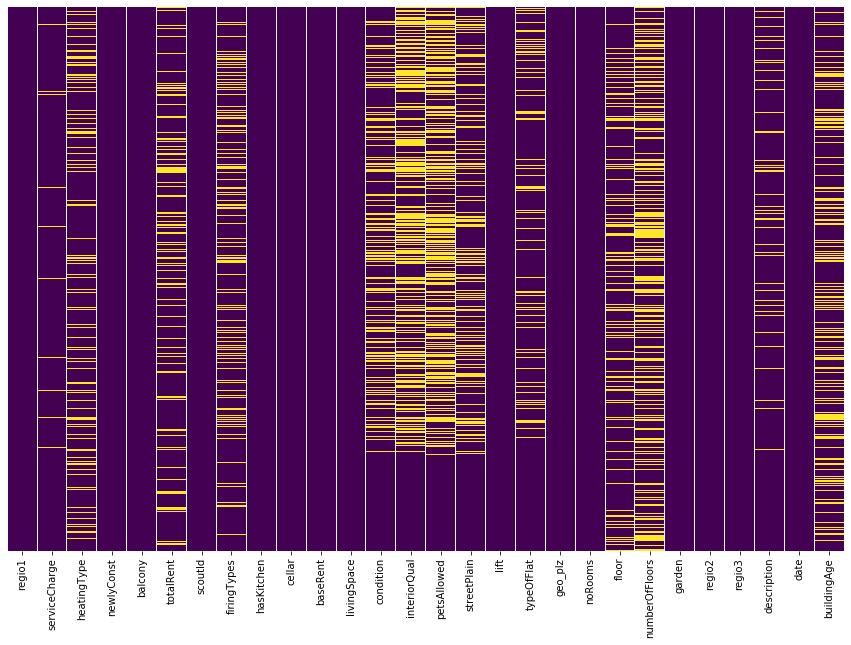

In [27]:
#check for missing values
# Yellow = NAN value
plt.figure(figsize = (15,10))
sns.heatmap(immo_data.isnull(),
            yticklabels=False,
            cbar=False,
            cmap='viridis');

Extract document requierments from description column. 
Look for: 
- Schufa
- Selbstauskunft (Personal Information)
- Einkommensnachweis or Gehaltsnachweis (Proof of income)
- Bürgschaft (guarantee)
- Mietschuldenfreiheitsbescheinigung (rental debt proof)
- Ausweis (ID)

In [28]:
# Make sure that all discriptions are string type
immo_data['description'] = immo_data['description'].apply(lambda x: str(x))

In [29]:
# schufa
immo_data['schufa_yn'] = immo_data['description'].apply(lambda x: 1 if 'schufa' in x.lower() else 0)

# Selbstauskunft
immo_data['PersonalInfo_yn'] = immo_data['description'].apply(lambda x: 1 if 'selbstauskunft' in x.lower() else 0)

# Einkommensnachweis or Gehaltsnachweis
immo_data['incomeProof_yn'] = immo_data['description'].apply(lambda x: 1 if ('einkommensnachweis' in x.lower() or
                                                                         'gehaltsnachweis' in x.lower()) else 0)
# Bürgschaft
immo_data['guarantee_yn'] = immo_data['description'].apply(lambda x: 1 if 'bürgschaft' in x.lower() else 0)

# Mietschuldenfreiheitsbescheinigung 
immo_data['debtFreeProof_yn'] = immo_data['description'].apply(lambda x: 1 if 'mietschuldenfreiheitsbescheinigung' in x.lower() else 0)

#Ausweis
immo_data['ID_yn'] = immo_data['description'].apply(lambda x: 1 if 'ausweis' in x.lower() else 0)                                                            

In [30]:
# chek type of falts in dataset
immo_data['typeOfFlat'].value_counts()

apartment              159219
roof_storey             42137
ground_floor            38659
other                   11768
maisonette              11355
no_information           7150
raised_ground_floor      6893
penthouse                4422
terraced_flat            4206
half_basement            2472
loft                     1180
Name: typeOfFlat, dtype: int64

In [31]:
# remove all 'other' and 'no_information' values
immo_data = immo_data[(immo_data['typeOfFlat'] != 'other') &
                     (immo_data['typeOfFlat'] != 'no_information')]

### Rent prices

Since there are no missing values in the baseRent column, i will use that to check if there are any outliers or extreme values that are not realistic

In [32]:
# remove decimiles
immo_data['baseRent'] = immo_data['baseRent'].apply(lambda x: int(x))

In [33]:
# remove all rows where the base rent is < 50€ and > 20000€
immo_data = immo_data[(immo_data['baseRent'] > 50) &
                     (immo_data['baseRent'] < 20000)]

In [34]:
# create column for utilitiesPrice
immo_data['utilitiesPrice'] = immo_data['totalRent'] - immo_data['baseRent']

# replace negative and NAN values with 0
immo_data['utilitiesPrice'] = immo_data['utilitiesPrice'].apply(lambda x: 0 if (x < 0 or np.isnan(x)== True) else x)

## Berlin data

In [35]:
# remove all rows where baserent is > than total rent
# fliter for Berlin
# save in new dataframe
immo_clean = immo_data[(immo_data['baseRent'] <= immo_data['totalRent']) & 
         (immo_data['regio1'] == 'Berlin')]

In [36]:
# Export clean dataset
immo_clean.to_csv(r'Data\immo_berlin.csv', index = False)